### Imports

In [9]:
import os
from ultralytics import YOLO

### Init

In [ ]:
os.makedirs("assets/results/yolo", exist_ok=True)
model = YOLO("yolov8n.pt")

# COCO dataset vehicle class IDs
# 2: car, 3: motorcycle, 5: bus, 7: truck
VEHICLE_CLASSES = [2, 3, 5, 7]

Test


image 1/1 c:\Users\pc\Desktop\coding\thesis\arch-test\assets\car2.jpg: 448x640 1 person, 3 cars, 1 skateboard, 104.4ms
Speed: 2.6ms preprocess, 104.4ms inference, 4.5ms postprocess per image at shape (1, 3, 448, 640)


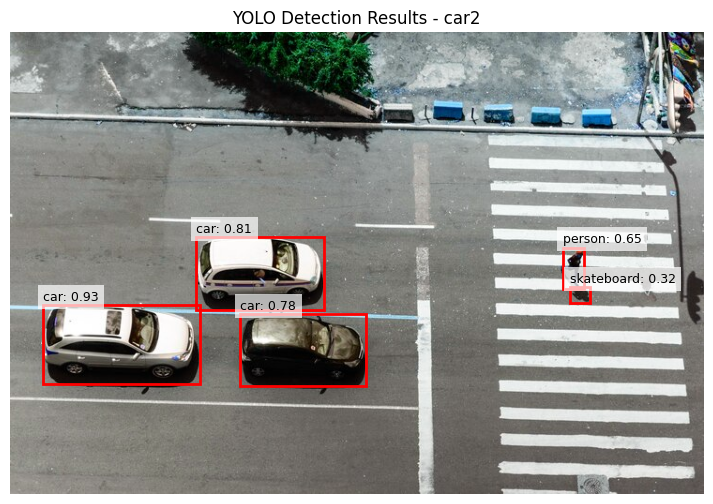

Detected 5 objects in car2


In [ ]:
file_name = "car2"
# Run inference with class filtering - only detect vehicles
results = model(f"assets/{file_name}.jpg", classes=VEHICLE_CLASSES)

# Alternative: Display using matplotlib for more control
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.imshow(results[0].orig_img)

# Get detection information
vehicle_count = 0
if results[0].boxes is not None:
    for box in results[0].boxes:
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        coords = box.xyxy[0].tolist()
        class_name = results[0].names[cls]
        
        # Draw bounding box
        x1, y1, x2, y2 = coords
        rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, fill=False, color='red')
        ax.add_patch(rect)
        
        # Add label with class name and confidence
        ax.text(x1, y1-5, f"{class_name}: {conf:.2f}", 
                fontsize=9, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
        
        vehicle_count += 1

plt.title(f"YOLO Vehicle Detection - {file_name}")
plt.axis('off')
plt.show()

print(f"Detected {vehicle_count} vehicle(s) in {file_name}")